The ML-100k dataset is the MovieLens 100k dataset, containing 100,000 movie ratings from 943 users on 1,682 movies. It's widely used for building and evaluating recommendation systems.


,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
99985,617,582,4,883789294,27,F,writer,11201,"Piano, The (1993)",01-Jan-1993,...,0,0,0,0,0,1,0,0,0,0
99986,913,690,3,880824288,27,M,student,76201,Seven Years in Tibet (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,1,0
99987,660,229,2,891406212,26,M,student,77380,Star Trek III: The Search for Spock (1984),01-Jan-1984,...,0,0,0,0,0,0,1,0,0,0
99988,421,498,4,892241344,38,F,programmer,55105,"African Queen, The (1951)",01-Jan-1951,...,0,0,0,0,0,1,0,0,1,0
99989,495,1091,4,888637503,29,M,engineer,03052,Pete's Dragon (1977),01-Jan-1977,...,0,0,0,1,0,0,0,0,0,0
99990,806,421,4,882388897,27,M,marketing,11217,William Shakespeare's Romeo and Juliet (1996),25-Oct-1996,...,0,0,0,0,0,1,0,0,0,0
99991,676,538,4,892685437,30,M,programmer,32712,Anastasia (1997),01-Jan-1997,...,0,0,0,1,0,0,0,0,0,0
99992,721,262,3,877137285,24,F,entertainment,11238,In the Company of Men (1997),01-Aug-1997,...,0,0,0,0,0,0,0,0,0,0
99993,913,209,2,881367150,27,M,student,76201,This Is Spinal Tap (1984),01-Jan-1984,...,0,0,0,1,0,0,0,0,0,0
99994,378,78,3,880056976,35,M,student,02859,Free Willy (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,0


Train size: 80000, Test size: 20000
Number of users in train set: 751, Number of users in test set: 301
Number of items in train set: 1616, Number of items in test set: 1448
Number of cold-start users (only in test set): 192
Epoch 1/20


Streaming output truncated to the last 5000 lines.
User 238 - True: {'385', '402', '195', '79', '82', '220', '185', '510', '61', '731', '121', '173', '772'}, Pred: ['437', '566', '71', '511', '97', '216', '845', '357', '237', '88']
User 239 - True: {'687', '1040', '176', '298', '623', '66'}, Pred: ['437', '566', '511', '71', '97', '237', '216', '845', '357', '88']
User 240 - True: {'72', '717', '230', '662', '941', '181', '71', '1469', '655', '462', '290', '295', '385', '772'}, Pred: ['437', '566', '71', '511', '97', '216', '357', '845', '88', '237']
User 241 - True: {'357', '97', '405', '1220', '210', '181', '176', '147', '392', '215', '731', '295', '200', '553', '692'}, Pred: ['437', '566', '511', '71', '97', '216', '237', '845', '357', '88']
User 242 - True: {'717', '357', '405', '69', '1469', '498', '1074', '108', '117', '298', '623', '61', '4', '385', '96', '692'}, Pred: ['437', '511', '566', '237', '845', '751', '682', '71', '408', '322']
User 243 - True: {'417', '50', '220', '47

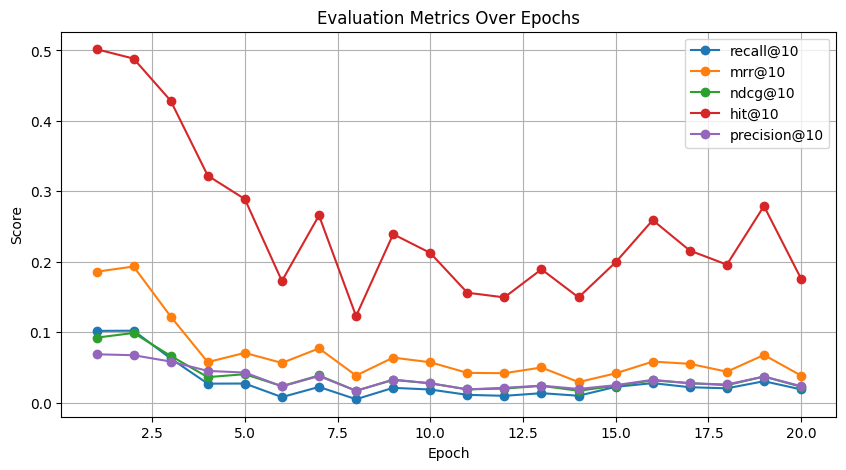

Recall@10: Measures the proportion of relevant items retrieved within the top 10 recommendations.
MRR@10 (Mean Reciprocal Rank): Evaluates how early the first relevant item appears in the ranked list (up to position 10).
NDCG@10 (Normalized Discounted Cumulative Gain): Considers both relevance and ranking position of items within the top 10.
Hit@10: Indicates whether at least one relevant item exists in the top 10 recommendations (1 for a hit, 0 otherwise).
Precision@10: Represents the proportion of recommended items in the top 10 that are actually relevant.
Training Completed! Metrics history saved to metrics_history.json


In [63]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import TFBertModel, BertConfig
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("The ML-100k dataset is the MovieLens 100k dataset, containing 100,000 movie ratings from 943 users on 1,682 movies. It's widely used for building and evaluating recommendation systems.")
# Further Fine Tuning Required

warnings.filterwarnings("ignore")

url_base = "https://files.grouplens.org/datasets/movielens/ml-100k/"
df = pd.read_csv(url_base + "u.data", sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

movies = pd.read_csv(url_base + "u.item", sep='|', encoding='latin-1', header=None, engine='python',
                      names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                             'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                             'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

users = pd.read_csv(url_base + "u.user", sep='|', header=None,
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

df['item_id'] = df['item_id'].astype(str)
movies['item_id'] = movies['item_id'].astype(str)
df = df.merge(users, on='user_id', how='left')
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s').astype(int) // 10**9
df = df.merge(movies, on='item_id', how='left')
df.drop(columns=['IMDb_URL', 'video_release_date', 'unknown'], inplace=True)


display(df.tail(15))

df = df.sort_values(by=['timestamp'])

# Create item mappings
unique_items = df['item_id'].unique()
item_to_idx = {item: idx + 1 for idx, item in enumerate(unique_items)}
idx_to_item = {idx: item for item, idx in item_to_idx.items()}
idx_to_title = {item_to_idx[row['item_id']]: row['title'] for _, row in movies.iterrows()}

def tokenize_data(data):
    return data.groupby('user_id')['item_id'].apply(lambda x: [item_to_idx.get(i, 0) for i in x]).reset_index()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)
print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")
print(f"Number of users in train set: {train_df['user_id'].nunique()}, Number of users in test set: {test_df['user_id'].nunique()}")
print(f"Number of items in train set: {train_df['item_id'].nunique()}, Number of items in test set: {test_df['item_id'].nunique()}")

# Identify cold-start users (users present only in test set, no prior data/new users)
cold_start_users = set(test_df['user_id']) - set(train_df['user_id'])
print(f"Number of cold-start users (only in test set): {len(cold_start_users)}")
train_sequences = tokenize_data(train_df)
test_sequences = tokenize_data(test_df)

max_seq_len = 512

def mask_items(sequences, mask_prob=0.2):
    masked_sequences, labels = [], []
    for seq in sequences:
        masked_seq = seq[:]
        label = [-1] * len(seq)
        for i in range(len(seq)):
            if np.random.rand() < mask_prob:
                label[i] = masked_seq[i]
                masked_seq[i] = 0

        if all(l == -1 for l in label):
            random_idx = np.random.randint(len(seq))
            label[random_idx] = masked_seq[random_idx]
            masked_seq[random_idx] = 0

        label = [l if l != -1 else 0 for l in label]
        masked_seq = masked_seq[:max_seq_len] + [0] * (max_seq_len - len(masked_seq))
        label = label[:max_seq_len] + [0] * (max_seq_len - len(label))

        masked_sequences.append(masked_seq)
        labels.append(label)
    return np.array(masked_sequences, dtype=np.int32), np.array(labels, dtype=np.int32)

train_input, train_labels = mask_items(train_sequences['item_id'].tolist())
test_input, test_labels = mask_items(test_sequences['item_id'].tolist())

class MaskedLoss(tf.keras.losses.Loss):
    def call(self, y_true, y_pred):
        mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
        return tf.reduce_sum(loss * mask) / tf.reduce_sum(mask)

bert_config = BertConfig(
    vocab_size=len(item_to_idx) + 1,
    hidden_size=128,
    num_hidden_layers=2,
    num_attention_heads=2,
    intermediate_size=512,
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2
)

class BERT4Rec(tf.keras.Model):
    def __init__(self, config):
        super(BERT4Rec, self).__init__()
        self.bert = TFBertModel(config)
        self.dense = tf.keras.layers.Dense(len(item_to_idx) + 1)

    def call(self, input_ids, training=False):
        outputs = self.bert(input_ids=input_ids[:, :512], training=training)
        logits = self.dense(outputs.last_hidden_state)
        return logits

model = BERT4Rec(bert_config)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss=MaskedLoss(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

def evaluate_metrics(model, test_input, test_labels, top_k=10):
    predictions = model.predict(test_input)
    logits = predictions[:, -1, :]  # Last position logits for all users
    recall, mrr, ndcg, hit, precision = 0, 0, 0, 0, 0
    num_samples = len(test_labels)

    for i in range(num_samples):
        # Convert true item indices to actual item IDs
        true_items = set([idx_to_item[idx] for idx in np.where(test_labels[i] > 0)[0] if idx in idx_to_item])

        # Get top-K predictions, excluding seen items
        pred_items = [
            idx_to_item[int(idx)] for idx in np.argsort(logits[i])[::-1]
            if int(idx) in idx_to_item and idx not in true_items
        ][:top_k]

        pred_items_set = set(pred_items)

        # Debugging: Print actual values
        print(f"User {i} - True: {true_items}, Pred: {pred_items}")

        # Compute Metrics
        correct_preds = len(true_items & pred_items_set)
        recall += correct_preds / len(true_items) if len(true_items) > 0 else 0

        for rank, item in enumerate(pred_items, start=1):
            if item in true_items:
                mrr += 1 / rank
                break

        dcg = sum([(1 / np.log2(rank + 2)) if pred_items and pred_items[rank] in true_items else 0 for rank in range(min(len(pred_items), top_k))])
        idcg = sum([1 / np.log2(rank + 2) for rank in range(min(len(true_items), top_k))])
        ndcg += dcg / idcg if idcg > 0 else 0

        hit += int(correct_preds > 0) if pred_items else 0
        precision += correct_preds / top_k if pred_items else 0

    return recall / num_samples, mrr / num_samples, ndcg / num_samples, hit / num_samples, precision / num_samples

metrics_history = {"recall@10": [], "mrr@10": [], "ndcg@10": [], "hit@10": [], "precision@10": []}

for epoch in range(20):
    print(f"Epoch {epoch+1}/20")
    model.fit(train_input, train_labels, validation_split=0.1, epochs=1, batch_size=16, verbose=1)
    recall, mrr, ndcg, hit, precision = evaluate_metrics(model, test_input, test_labels)
    print(f"Metrics at epoch {epoch+1}:")
    print(f"Recall@10: {recall:.8f}, MRR@10: {mrr:.8f}, NDCG@10: {ndcg:.8f}, Hit@10: {hit:.8f}, Precision@10: {precision:.8f}")
    metrics_history["recall@10"].append(recall)
    metrics_history["mrr@10"].append(mrr)
    metrics_history["ndcg@10"].append(ndcg)
    metrics_history["hit@10"].append(hit)
    metrics_history["precision@10"].append(precision)
    print(metrics_history)

def recommend_items(user_id, top_k=10):
    user_sequence_row = train_sequences.loc[train_sequences['user_id'] == user_id]

    if user_sequence_row.empty:
        print(f"No interaction history found for User ID {user_id}.")
        return []

    user_sequence = user_sequence_row['item_id'].values[0]
    watched_items_set = set(user_sequence)

    input_sequence = np.array([user_sequence + [0] * (max_seq_len - len(user_sequence))])

    predictions = model(input_sequence, training=False).numpy()[0]
    logits = predictions[-1]
    probabilities = tf.nn.softmax(logits).numpy()

    top_indices = [idx for idx in np.argsort(logits)[::-1] if idx not in watched_items_set][:top_k]

    print(f"Top Recommended Items for User ID {user_id}:")
    recommended_items = []

    for i, idx in enumerate(top_indices):
        if idx != 0:
            item_id = idx_to_item[idx]
            item_name = idx_to_title[idx]
            logit_score = logits[idx]
            prob_score = probabilities[idx]
            recommended_items.append((item_id, item_name, logit_score, prob_score))
            print(f"{i+1}. Item ID: {item_id}, Name: {item_name}, Logit Score: {logit_score:.4f}, Probability: {prob_score:.4f}")

    return recommended_items

recommend_items(user_id=1, top_k=10)
recommend_items(user_id=2, top_k=10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for metric_name, values in metrics_history.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Evaluation Metrics Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

import json

with open("metrics_history.json", "w") as f:
    json.dump(metrics_history, f, indent=4)

print("Recall@10: Measures the proportion of relevant items retrieved within the top 10 recommendations.")
print("MRR@10 (Mean Reciprocal Rank): Evaluates how early the first relevant item appears in the ranked list (up to position 10).")
print("NDCG@10 (Normalized Discounted Cumulative Gain): Considers both relevance and ranking position of items within the top 10.")
print("Hit@10: Indicates whether at least one relevant item exists in the top 10 recommendations (1 for a hit, 0 otherwise).")
print("Precision@10: Represents the proportion of recommended items in the top 10 that are actually relevant.")


print("Training Completed! Metrics history saved to metrics_history.json")

In [ ]:
!pip install recbole ray kmeans_pytorch optuna wandb surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/

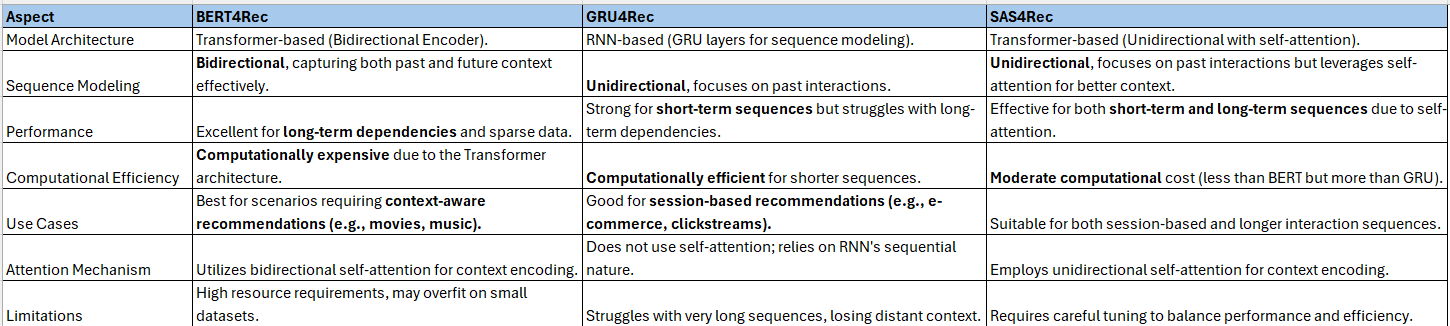